In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import gensim
from sklearn.linear_model import LinearRegression



In [7]:
# Content Recommendation Engine (Word2Vec + Cosine Similarity)

# Sample content database
content_database = [
    "How to improve social media engagement",
    "Tips for better content creation",
    "Maximizing reach on Instagram and Facebook",
    "AI in social media management",
    "Content strategies for SMBs"
]

# Function to train Word2Vec model on content database
def train_word2vec_model(content_database):
    # Preprocess the content into tokenized sentences
    tokenized_content = [content.lower().split() for content in content_database]

    # Train Word2Vec model
    model = gensim.models.Word2Vec(sentences=tokenized_content, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to get recommendations using Word2Vec
def recommend_content_w2v(query, content_database, model):
    query_tokens = query.lower().split()

    # Calculate similarity between query and content
    similarities = []
    for content in content_database:
        content_tokens = content.lower().split()
        similarity = model.wv.n_similarity(query_tokens, content_tokens)
        similarities.append(similarity)

    # Sort and return top 3 recommendations
    most_similar_indices = np.argsort(similarities)[::-1]
    top_3_recommendations = [content_database[i] for i in most_similar_indices[:3]]

    return top_3_recommendations



In [8]:
# Automated Scheduling System

# Dummy engagement data for optimal posting time
engagement_data = {
    8: 45, 9: 60, 10: 70, 11: 85, 12: 95,
    13: 80, 14: 75, 15: 65, 16: 60, 17: 50, 18: 55
}

# Function to predict engagement with a machine learning model
def predict_engagement(engagement_data):
    hours = np.array(list(engagement_data.keys())).reshape(-1, 1)
    engagement = np.array(list(engagement_data.values()))

    # Train a linear regression model to predict engagement
    model = LinearRegression()
    model.fit(hours, engagement)

    # Predict engagement for each hour
    predicted_engagement = model.predict(hours)

    return hours.flatten(), predicted_engagement

# Function to get optimal posting time
def suggest_posting_time():
    optimal_hour = max(engagement_data, key=engagement_data.get)
    return optimal_hour

# Function to schedule a post
def schedule_post(content, schedule_time=None):
    if schedule_time is None:
        schedule_time = datetime.now() + timedelta(hours=1)

    print(f"Post scheduled: '{content}' at {schedule_time.strftime('%Y-%m-%d %H:%M:%S')}")
    return schedule_time



In [9]:
# Analytics Dashboard

# Dummy engagement data
engagement_metrics = {
    'likes': [100, 120, 90, 150, 180],
    'comments': [25, 30, 20, 40, 35],
    'shares': [10, 12, 8, 15, 18],
    'sentiment': [0.75, 0.80, 0.60, 0.85, 0.90]
}
posts = ['Post 1', 'Post 2', 'Post 3', 'Post 4', 'Post 5']

# Function to plot engagement metrics
def plot_engagement(engagement_metrics, posts):
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Plot likes
    ax[0, 0].bar(posts, engagement_metrics['likes'], color='skyblue')
    ax[0, 0].set_title('Likes')

    # Plot comments
    ax[0, 1].bar(posts, engagement_metrics['comments'], color='lightgreen')
    ax[0, 1].set_title('Comments')

    # Plot shares
    ax[1, 0].bar(posts, engagement_metrics['shares'], color='salmon')
    ax[1, 0].set_title('Shares')

    # Plot sentiment
    ax[1, 1].plot(posts, engagement_metrics['sentiment'], color='purple', marker='o')
    ax[1, 1].set_title('Sentiment')

    plt.tight_layout()
    plt.show()



Welcome to SocialBoost!

Enter a content topic you'd like recommendations for: AI-driven social media tips

Top 3 recommended content based on your query:
1. AI in social media management
2. How to improve social media engagement
3. Tips for better content creation

Enter the content you want to schedule: Post about AI-driven social media strategies
Suggested optimal posting time: 12:00
Would you like to schedule the post for 12:00? (y/n): y
Post scheduled: 'Post about AI-driven social media strategies' at 2024-09-19 12:00:27

Displaying engagement metrics for your recent posts...



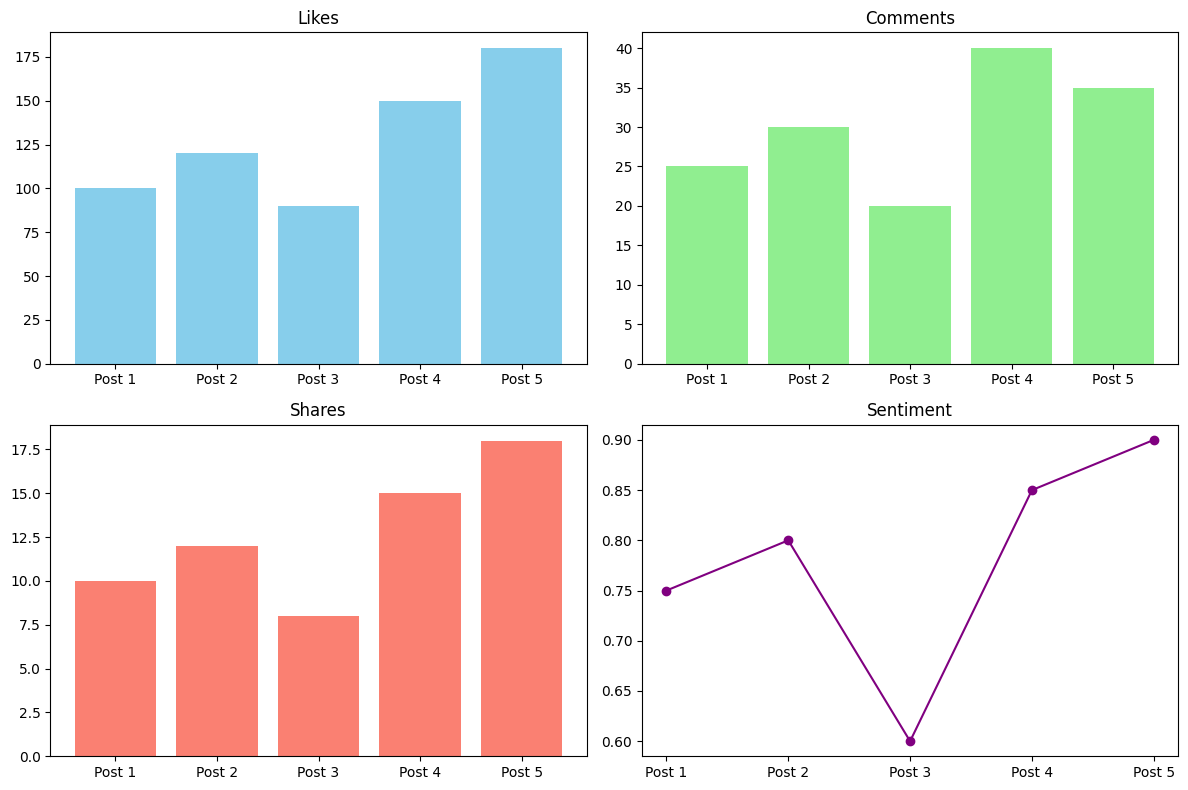


Predicting future engagement...



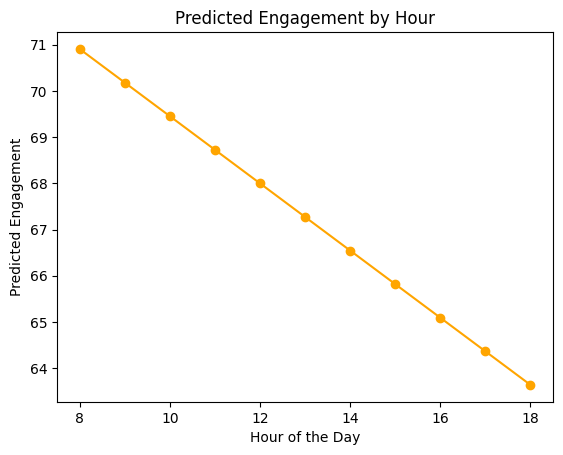

In [10]:
# Main Program Flow

def main():
    print("Welcome to SocialBoost!\n")

    # Step 1: Content Recommendation using Word2Vec
    query = input("Enter a content topic you'd like recommendations for: ")
    w2v_model = train_word2vec_model(content_database)
    recommendations = recommend_content_w2v(query, content_database, w2v_model)

    print("\nTop 3 recommended content based on your query:")
    for i, rec in enumerate(recommendations, start=1):
        print(f"{i}. {rec}")

    # Step 2: Automated Scheduling
    content = input("\nEnter the content you want to schedule: ")
    optimal_time = suggest_posting_time()
    print(f"Suggested optimal posting time: {optimal_time}:00")

    schedule_choice = input(f"Would you like to schedule the post for {optimal_time}:00? (y/n): ")
    if schedule_choice.lower() == 'y':
        scheduled_time = schedule_post(content, datetime.now().replace(hour=optimal_time, minute=0))
    else:
        scheduled_time = schedule_post(content)

    # Step 3: Analytics Dashboard and Engagement Prediction
    print("\nDisplaying engagement metrics for your recent posts...\n")
    plot_engagement(engagement_metrics, posts)

    print("\nPredicting future engagement...\n")
    hours, predicted_engagement = predict_engagement(engagement_data)
    plt.plot(hours, predicted_engagement, color='orange', marker='o')
    plt.title("Predicted Engagement by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Predicted Engagement")
    plt.show()

if __name__ == "__main__":
    main()
